### data loading

In [4]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
import torchvision.transforms as transforms

In [5]:
my_transforms = transforms.ToTensor()

train_dataset = torchvision.datasets.FashionMNIST(root="data", download=False, train=True, transform=my_transforms)
test_dataset = torchvision.datasets.FashionMNIST(root="data", download=False, train=False, transform=my_transforms)

In [6]:
batch_size = 32

train_dataloader = data.DataLoader(dataset=train_dataset, shuffle=True, batch_size=32, num_workers=4)
test_dataloader = data.DataLoader(dataset=test_dataset, shuffle=False, batch_size=32, num_workers=4)

In [7]:
def get_fashion_mnist_labels(labels):
    label_encoded = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
    label_texts = []
    for label in labels:
        label_texts.append(label_encoded[label])
    
    return label_texts

torch.Size([1, 28, 28])
['shirt']


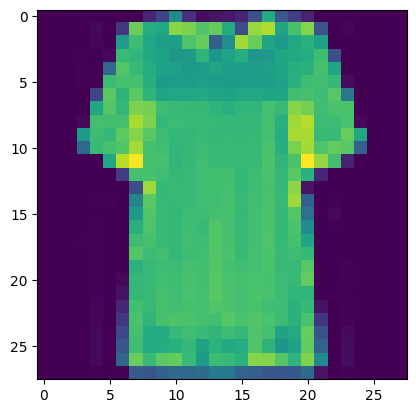

In [8]:

import matplotlib.pyplot as plt

for X,y in train_dataloader:
    print(X[0].shape)
    plt.imshow(X[0].permute(1,2,0))
    print(get_fashion_mnist_labels([y[0]]))
    break

In [9]:
def show_images (imgs,num_cols, num_rows, title=None, scale=0.5):
    figsize = (num_cols* scale, num_rows * scale)
    plt.subplots_adjust(hspace=0.8, wspace=0.2)
    for i in range(len(imgs)):
#         plt.figure(figsize=figsize)
        plt.subplot(num_cols, num_rows, i+1)
        plt.imshow(imgs[i].permute(1,2,0))
#         plt.text(0.5, -0.02,title[i],fontsize=9 )
        plt.title(title[i], fontsize=9)
        plt.axis('off')
        plt.grid(b=None)

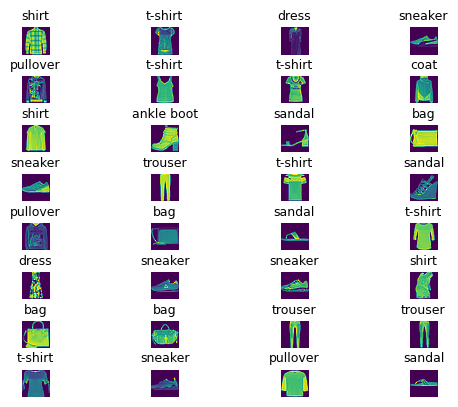

In [10]:
for X, y in train_dataloader:
    labels = get_fashion_mnist_labels(y)
    show_images(X,8,4, title=labels)
    break

### initialising model parameters

In [11]:
# each figure is 28 by 28 since we would be flattening it so the input size becomes 28 * 28
# the number of output would be in this case 10
# since we would have onlu one so w would be 784 * 10 and bias would be 1 * 10

W = torch.normal(0,1,size=(784,10), requires_grad=True)
# b = torch.normal(0,1,size=(1,10), requires_grad=True)


In [12]:
b = torch.zeros(10, requires_grad=True)

In [13]:
# defining softmax

def softmax(X):
    numerator = torch.exp(X)
    denominator = numerator.sum(1, keepdims=True)
    return numerator/denominator

In [14]:
X = torch.normal(0,1,size=(3,2))
print("Before softmax: ")
print(X)
print(X.sum(dim=1)) # the sum not equal to 1
print("\nAfter softmax: ")
print(softmax(X))
print(softmax(X).sum(dim=1)) # verified softmax is working as it should be

Before softmax: 
tensor([[ 1.0345,  0.1281],
        [-1.8124,  0.9650],
        [ 0.4492,  0.5264]])
tensor([ 1.1626, -0.8475,  0.9755])

After softmax: 
tensor([[0.7123, 0.2877],
        [0.0586, 0.9414],
        [0.4807, 0.5193]])
tensor([1., 1., 1.])


In [15]:
def softmax_regression_model(X):
    return softmax(torch.matmul(X.reshape(-1,W.shape[0]), W) + b)

In [16]:
# without training prediction
for X, y in train_dataloader:
    with torch.no_grad():
        result = softmax_regression_model(X[0])
        print(result.argmax(1))
    break

tensor([2])


In [17]:
# cross entropy is negative log of probabilities(taken from y_hat) of actual label (taken from y)
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])
    

In [18]:
# looking at loss

for X, y in train_dataloader:
    with torch.no_grad():
        result = softmax_regression_model(X)
        print(f"Output from softmax regression model for entire batch (y_hat) :\n\n{result}\n")
        loss = cross_entropy(result, y)
        print(f"The loss :\n\n{loss}\n")
        print(f"Argmax of result :\n\n{result.argmax(1)}\n")
        
    break

Output from softmax regression model for entire batch (y_hat) :

tensor([[1.0479e-05, 1.5476e-05, 1.8590e-12, 1.6516e-19, 5.4389e-11, 2.8421e-02,
         2.3311e-10, 8.1745e-10, 9.0216e-06, 9.7154e-01],
        [6.2120e-04, 3.5538e-08, 1.5644e-02, 7.8303e-17, 1.4125e-10, 3.3947e-04,
         9.8325e-01, 1.4658e-04, 8.4458e-10, 1.9531e-07],
        [3.8425e-05, 7.6738e-07, 1.3454e-05, 4.9087e-18, 3.1172e-10, 2.5087e-03,
         9.9529e-01, 3.1404e-09, 2.6469e-07, 2.1458e-03],
        [2.1352e-13, 3.3865e-24, 1.0000e+00, 2.1506e-33, 4.8908e-13, 1.5536e-13,
         4.4755e-19, 1.8209e-20, 3.0794e-18, 2.4225e-21],
        [9.1775e-11, 7.4062e-13, 1.3871e-07, 1.2534e-18, 4.2956e-10, 1.0000e+00,
         2.1635e-12, 2.7595e-12, 1.0741e-08, 2.3214e-06],
        [1.2100e-06, 9.4432e-03, 7.7728e-02, 4.3749e-14, 7.8574e-07, 3.1750e-08,
         1.4473e-05, 1.2216e-11, 4.1632e-08, 9.1281e-01],
        [2.7179e-09, 4.5095e-14, 4.3661e-04, 6.0274e-12, 1.4584e-03, 9.9810e-01,
         1.0837e-07,

In [19]:
def accuracy(y_hat, y):
#     print(y_hat.argmax(1))
    return (y_hat.argmax(1)==y).sum()

In [20]:
# looking at accuracy

for X,y in train_dataloader:
    with torch.no_grad():
        predictions = softmax_regression_model(X)
        acc = accuracy(predictions, y)
        print("Accuracy: \n", acc/ len(y) )
        break

Accuracy: 
 tensor(0.1562)


In [21]:
# for the entire dataset evaluation of accuracy

def evaluate_accuracy(net, data_iter):
    tot_acc=0
    tot_number=0
    with torch.no_grad():
        for X, y in data_iter:
            predictions = net(X)
            tot_acc += int(accuracy(predictions, y))
            tot_number += len(y)
    return tot_acc/tot_number
            
        

In [22]:
evaluate_accuracy(softmax_regression_model, train_dataloader)

0.16775

In [23]:
def sgd(params=[W,b], lr=0.1, batch_size=batch_size):
    with torch.no_grad():
        for param in params:
            param -= param.grad * lr /batch_size
            param.grad.zero_()
        

In [24]:
W, b, W.shape, b.shape, W.grad, b.grad # initial Weight values

(tensor([[-0.2761, -0.0872, -0.1304,  ...,  0.8615,  0.1464, -1.2647],
         [-0.2191, -0.9304,  0.4469,  ..., -1.0833,  0.0949,  1.1748],
         [-0.5398,  2.6279, -0.3407,  ...,  0.3952,  0.2987,  0.9000],
         ...,
         [-0.4846, -0.4883,  0.4489,  ..., -0.0595, -0.9415,  0.9880],
         [-0.5562,  0.0064, -1.0681,  ...,  0.4157,  0.5442,  0.1382],
         [-0.1560,  1.9452,  0.7424,  ...,  0.4894, -0.6533,  0.0975]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True),
 torch.Size([784, 10]),
 torch.Size([10]),
 None,
 None)

In [25]:
def train_epoch_ch3(net, train_iter, loss, updater):
    training_loss = 0
    training_len = 0
    training_acc = 0
    for X,y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        l.sum().backward()
        updater()
        training_len += len(y)
        training_loss += l.sum()
        training_acc += accuracy(y_hat, y)
    
    avg_loss = training_loss/training_len
    avg_acc = training_acc/training_len
    print(f"> average training acc: {avg_acc}")
    print(f"> average training loss: {avg_loss}")
    return avg_loss, avg_acc
        

In [30]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
    train_loss_array = []
    train_acc_array = []
    test_acc_array = []
    for epoch in range(num_epochs):
        print(f"\nEpoch: {epoch}")
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        train_loss, train_acc = train_metrics
        test_acc = evaluate_accuracy(net, test_iter)
        print(f"> The test accuracy: {test_acc}")
        
        train_loss_array.append(train_loss.detach())
        train_acc_array.append(train_acc.detach())
        test_acc_array.append(test_acc)
        
    plt.plot(range(1,num_epochs+1), train_loss_array, '-g', label='training loss')
    plt.plot(range(1,num_epochs+1), train_acc_array, '-b', label='training accuracy')
    plt.plot(range(1,num_epochs+1), test_acc_array, '-r', label='test accuracy')
    plt.legend()
    plt.show()


Epoch: 0
> average training acc: 0.8274499773979187
> average training loss: 0.5707641839981079
> The test accuracy: 0.8117

Epoch: 1
> average training acc: 0.83160001039505
> average training loss: 0.5543148517608643
> The test accuracy: 0.8105

Epoch: 2
> average training acc: 0.8314333558082581
> average training loss: 0.5436446666717529
> The test accuracy: 0.8043

Epoch: 3
> average training acc: 0.835183322429657
> average training loss: 0.5354011654853821
> The test accuracy: 0.812

Epoch: 4
> average training acc: 0.834683358669281
> average training loss: 0.5275133848190308
> The test accuracy: 0.811

Epoch: 5
> average training acc: 0.8375999927520752
> average training loss: 0.516660213470459
> The test accuracy: 0.8221

Epoch: 6
> average training acc: 0.8379499912261963
> average training loss: 0.5085131525993347
> The test accuracy: 0.822

Epoch: 7
> average training acc: 0.8398333191871643
> average training loss: 0.5030721426010132
> The test accuracy: 0.824

Epoch: 8

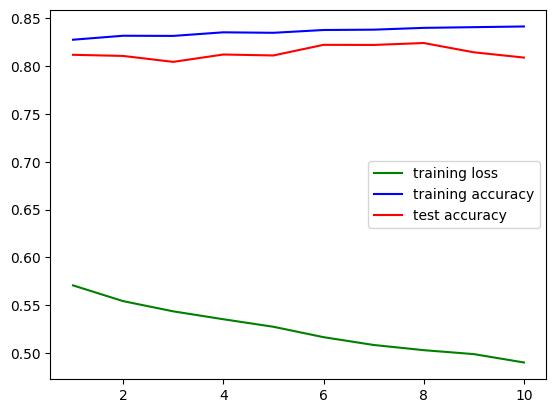

In [31]:
num_epochs = 10
train_ch3(softmax_regression_model, train_dataloader, test_dataloader, cross_entropy,num_epochs, sgd)

In [36]:
# predictions

def prediction_ch3(net, test_iter, n=6):
    for X,y in test_iter:
        break
    
    predicted_labels = net(X[:n]).argmax(dim=1)
    actual_labels = y[:n]
    
#     print(predicted_labels, actual_labels)
    
    show_images(X[:n], 2, 3, title=get_fashion_mnist_labels(predicted_labels))
    print(get_fashion_mnist_labels(actual_labels))

['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser']


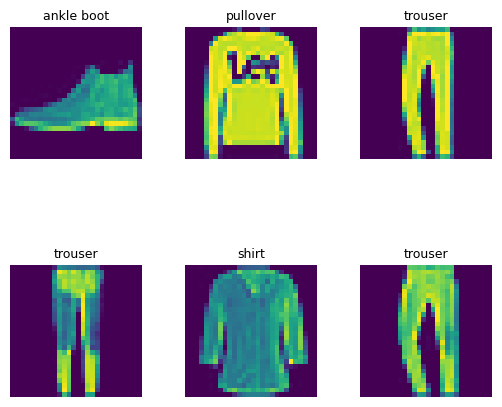

In [37]:
prediction_ch3(softmax_regression_model, test_dataloader)

## Exercises

1. In this section, we directly implemented the softmax function based on the mathematical
definition of the softmax operation. What problems might this cause? Hint: try to calculate
the size of exp(50).

* the number is too big

2. The function cross_entropy in this section was implemented according to the definition of
the cross-entropy loss function. What could be the problem with this implementation? Hint:
consider the domain of the logarithm.

* domain of logarithm is all non negative numbers.

3. What solutions you can think of to fix the two problems above?

* normalise the data first

4. Is it always a good idea to return the most likely label? For example, would you do this for
medical diagnosis?

* no in medical dignosis we need high confidence in our predictions, so we need most likely label above a confidence threshold (probability)

5. Assume that we want to use softmax regression to predict the next word based on some
features. What are some problems that might arise from a large vocabulary?

* if the vocabulary is large then the one hotencoding of the array would be big, and sparse too, we cannot directly apply softmax over all possible y values which will be equal to length of the vocabulary.

In [39]:
#1

torch.exp(torch.tensor(50.)) # big number to work out

tensor(5.1847e+21)

## Concise implementation of softmax

In [52]:
batch_size=256
train_iter, test_iter = train_dataloader, test_dataloader

In [53]:
import torch.nn as nn

In [54]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784,10))

In [55]:
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

In [56]:
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [57]:
loss = nn.CrossEntropyLoss()

In [68]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

for epoch 0:

test accuracy: 0.8304
average accuracy: 0.864799976348877
average loss: 0.7928705338731408
for epoch 1:

test accuracy: 0.8369
average accuracy: 0.863183319568634
average loss: 0.7250519482736786
for epoch 2:

test accuracy: 0.8294
average accuracy: 0.8633333444595337
average loss: 0.6770170192278921
for epoch 3:

test accuracy: 0.8258
average accuracy: 0.8626333475112915
average loss: 0.6418089050819477
for epoch 4:

test accuracy: 0.8305
average accuracy: 0.8617166876792908
average loss: 0.6124458115095893
for epoch 5:

test accuracy: 0.828
average accuracy: 0.8618666529655457
average loss: 0.5909895205110312
for epoch 6:

test accuracy: 0.8192
average accuracy: 0.8622000217437744
average loss: 0.5708764325484633
for epoch 7:

test accuracy: 0.8291
average accuracy: 0.8620333075523376
average loss: 0.5520904367595911
for epoch 8:

test accuracy: 0.8321
average accuracy: 0.8618333339691162
average loss: 0.538411581092452
for epoch 9:

test accuracy: 0.826
average accurac

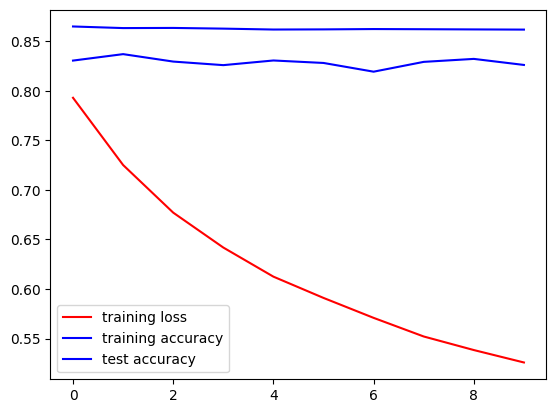

In [69]:
num_epoch =2


train_loss_array = []
train_acc_array = []
test_acc_array = []

for epoch in range(num_epochs):
    training_loss = 0
    training_len = 0
    training_acc = 0

    print(f"for epoch {epoch}:\n")
    net.train()
    for X,y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
        
        training_loss += float(l)* len(y)
        training_len += len(y)
        training_acc +=  accuracy(y_hat, y)
    
    test_acc = evaluate_accuracy(net, test_iter)
    print(f"test accuracy: {test_acc}")
    
    avg_acc = training_acc/training_len
    avg_loss = training_loss/training_len
    
    train_loss_array.append(avg_loss)
    train_acc_array.append(avg_acc)
    test_acc_array.append(test_acc)
    
    print(f"average accuracy: {avg_acc}")
    print(f"average loss: {avg_loss}")

plt.plot(range(epoch+1), train_loss_array, "-r", label="training loss")
plt.plot(range(epoch+1), train_acc_array, "-b", label="training accuracy")
plt.plot(range(epoch+1), test_acc_array, "-b", label="test accuracy")
plt.legend()
plt.show()
    
        

In [70]:
train_acc_array,test_acc_array

([tensor(0.8648),
  tensor(0.8632),
  tensor(0.8633),
  tensor(0.8626),
  tensor(0.8617),
  tensor(0.8619),
  tensor(0.8622),
  tensor(0.8620),
  tensor(0.8618),
  tensor(0.8616)],
 [0.8304,
  0.8369,
  0.8294,
  0.8258,
  0.8305,
  0.828,
  0.8192,
  0.8291,
  0.8321,
  0.826])

### Exercises

1. Try adjusting the hyperparameters, such as the batch size, number of epochs, and learning
rate, to see what the results are.

* changing batch_Size increases time, more epochs trainingaccuracy is more or less constant, learning rate we have to try, changing to 1 loss increases, 0.01 converges slowly.

2. Increase the number of epochs for training. Why might the test accuracy decrease after a
while? How could we fix this?

* maybe overfitting
